# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import curve_fit
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from Spike_Generation import NL

importing Jupyter notebook from Spike_Generation.ipynb


In [3]:
#This function deals with differentiation of angle within [-pi,pi).
#It will fail if angle array x change too fast.
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

![title](D:\GoogleDrive\retina\Chou's data\20210504\FIG\cSTA\fitNGD2Lparameter.tiff)

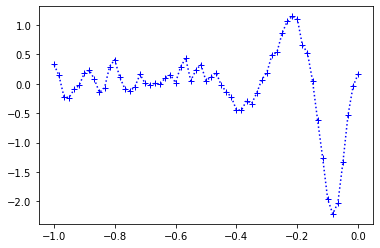

In [4]:
fig, ax = plt.subplots()
exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513'
annots = loadmat(exp_folder+'\\merge\\merge_0224_cSTA_wf_3min_Q100_re', squeeze_me = True)
x = annots['bin_pos']
x = x-np.mean(x)
dt = 1/60
cn = 30-1

spike = annots['reconstruct_spikes'][cn]
rstate, _ = np.histogram(spike, np.arange(len(x)+1)*dt)
cSTA = np.correlate(x , rstate, 'same')/ np.correlate(np.ones_like(x), rstate, 'same')
cSTA = cSTA[int(len(cSTA)/2):int(len(cSTA)/2-1/dt)-1:-1]
taxis = -np.arange(len(cSTA))*dt
ax.plot(taxis, cSTA, 'b+:')

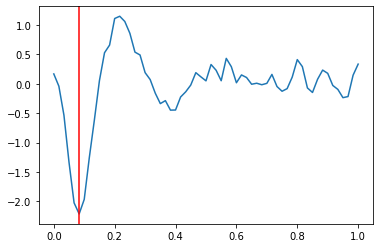

In [11]:
plt.plot(-taxis, cSTA)
plt.axvline(dt*5, c = 'r')

# NGD2L_FBFF 

In [6]:
def NGD2L_TK_AS(T, epsilon, gamma, omegastar, deltastar, tau, Dmp):
    dt = np.mean(np.diff(T))
    dt = dt/50
    T = np.arange(0, T[-1]+dt, dt)
    x = T/tau_y /tau_y *np.exp(-T/tau_y)*dt
    
    Kw = -Dmp*( 1/np.cos(deltastar)*np.exp(-T*epsilon)*np.cos(T*omegastar+deltastar) -np.exp(-gamma*T) )
    w = np.convolve(x, Kw, 'full')[:len(T):50]*dt
    return w/(dt)

epsilon  : 6.927064044763076
gamma    : 42.55355457809214
omegastar: 20.309390015129903
deltastar: -0.5782914185789136
tau      : 6.927064044763076
Dmp      : 4.244294302103179


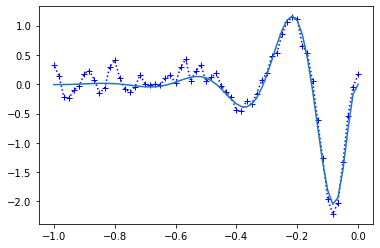

In [8]:
epsilon = 10
omegastar = 30
deltastar = 0
gamma = 1000
tau = 0.03
Bmp = 20
Dmp = 1
popt,pcov = curve_fit(NGD2L_TK_AS, np.abs(taxis) , cSTA, p0=[epsilon, gamma, omegastar, deltastar, tau,  Dmp],
                      bounds = ([0     , 0     , 0     ,-np.pi, 0     , 0     ],
                                [np.inf, np.inf, np.inf, np.pi, 0.6   , np.inf]) )
[tau, gamma, omegastar, deltastar, tau_y,  Dmp] = popt
print('epsilon  :',tau)
print('gamma    :',gamma)
print('omegastar:',omegastar)
print('deltastar:',deltastar)
print('tau      :',tau)
print('Dmp      :',Dmp)
fit_cSTA = NGD2L_TK_AS(np.abs(taxis), *popt).copy()
ax.plot(taxis, fit_cSTA)
fig

# White Noise

In [21]:
sum(fit_cSTA)*dt

-0.08626601731188237

In [47]:
wn = np.random.randn(50001)
output = np.convolve(wn*2+6.5, fit_cSTA, 'full')[:50001]*dt

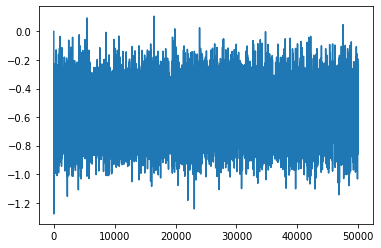

In [48]:
plt.plot(output)

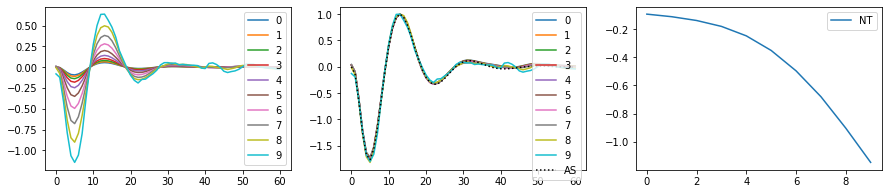

In [49]:
c = 0
mag = []
fig, ax = plt.subplots(1, 3)
for theta in np.linspace(min(output), np.mean(output)+2*np.std(output), 10):
    wnTK = np.correlate(NL(output,theta), wn,  'same') / np.correlate(NL(output,theta), np.ones(50001),  'same')
    wnTK = wnTK[25000:25000+len(fit_cSTA)]
    ax[0].plot(wnTK, label = str(c))
    ax[1].plot(wnTK/max(wnTK), label = str(c))
    c+=1
    mag.append(min(wnTK))
ax[1].plot(fit_cSTA/max(fit_cSTA), 'k:', label = 'AS')
ax[2].plot(mag, label='NT')
for a in ax:
    a.legend()
fig.set_size_inches(15,3)

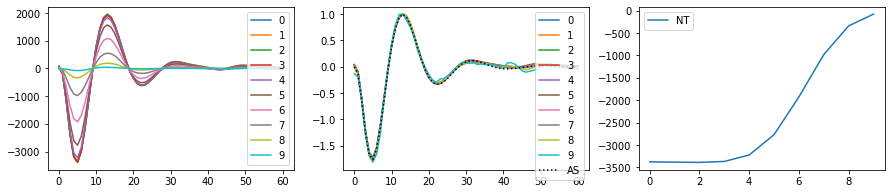

In [50]:
c = 0
mag = []
fig, ax = plt.subplots(1, 3)
for theta in np.linspace(min(output), np.mean(output)+2*np.std(output), 10):
    wnTK = np.correlate(NL(output,theta), wn,  'same')
    wnTK = wnTK[25000:25000+len(fit_cSTA)]
    ax[0].plot(wnTK, label = str(c))
    ax[1].plot(wnTK/max(wnTK), label = str(c))
    c+=1
    mag.append(min(wnTK))
ax[1].plot(fit_cSTA/max(fit_cSTA), 'k:', label = 'AS')
ax[2].plot(mag, label='NT')
for a in ax:
    a.legend()
fig.set_size_inches(15,3)